In [68]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df=pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [71]:
df['LIMIT_BAL'],df['default payment next month']

(0         20000
 1        120000
 2         90000
 3         50000
 4         50000
           ...  
 26659    220000
 26660    150000
 26661     30000
 26662     80000
 26663     50000
 Name: LIMIT_BAL, Length: 26664, dtype: int64,
 0        1
 1        1
 2        0
 3        0
 4        0
         ..
 26659    0
 26660    0
 26661    1
 26662    1
 26663    1
 Name: default payment next month, Length: 26664, dtype: int64)

In [72]:
X=df['LIMIT_BAL'].values.reshape(-1,1)
y=df['default payment next month']

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [75]:
log_model=LogisticRegression()

In [76]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [77]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [78]:
pred=log_model.predict(X_test)
pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
#prediction probabilities comprising of 0 and 1 classes - > 0,1 respectively
pred_prob=log_model.predict_proba(X_test)
pred_prob

array([[0.85704879, 0.14295121],
       [0.83932616, 0.16067384],
       [0.6343848 , 0.3656152 ],
       ...,
       [0.82981809, 0.17018191],
       [0.69563796, 0.30436204],
       [0.85704879, 0.14295121]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [80]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve

In [81]:
roc_auc_score(y_test,pred_prob[:,1])

0.6170050717511655

_________________________________________________________________________
**Now, plot the ROC curve.**


Some Important Terms For Plotting ROC Curve : <br><br>
fpr -> False Positive Rate <br>
npr -> Negative Positive Rate <br>
thres -> Threshold Value <br>

In [82]:
#Plotting The ROC Curve :
fpr,tpr,thres=roc_curve(y_test,pred_prob[:,1])

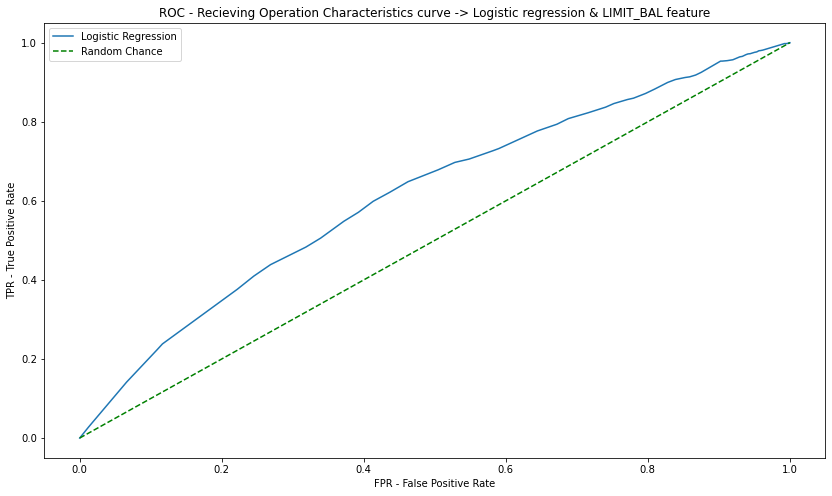

In [83]:
plt.figure(figsize=(14,8))
plt.plot(fpr,tpr,"-")
plt.plot([0,1],[0,1],'g--')

plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('ROC - Recieving Operation Characteristics curve -> Logistic regression & LIMIT_BAL feature')
plt.legend(['Logistic Regression','Random Chance'])

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


Precision-Recall curve  <br> <br>
    
    precision 
    recall 
    thresh1 

In [84]:
from sklearn.metrics import precision_recall_curve,precision_score,precision_recall_fscore_support

In [85]:
precision,recall,thresh1=precision_recall_curve(y_test,pred_prob[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision and recall Curve - >  logistic regression & LIMIT_BAL')

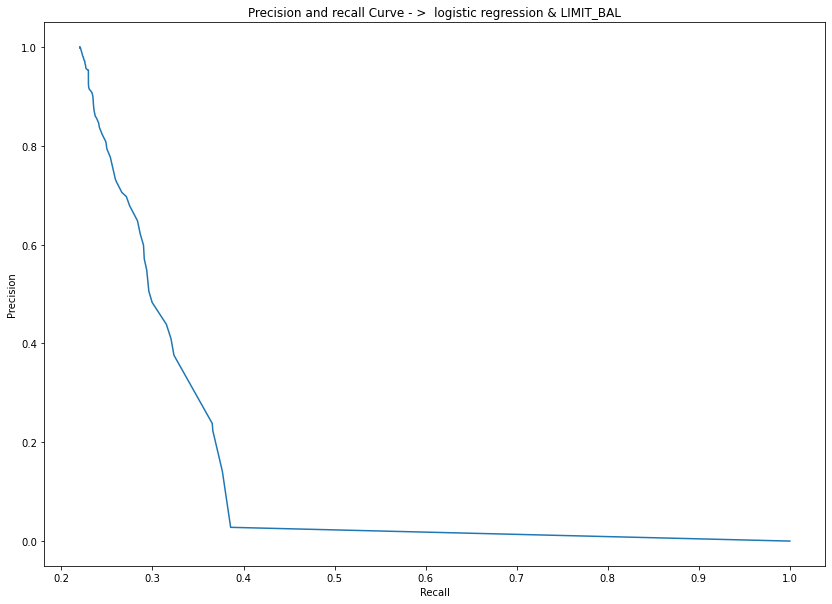

In [86]:
plt.figure(figsize=(14,10))
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall Curve - >  logistic regression & LIMIT_BAL')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [87]:
#Area Under Curve - > AUC :
from sklearn.metrics import auc

In [88]:
auc(recall,precision)

0.3147009000933155

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [89]:
#For Training Data :
xtrain_pred=log_model.predict(X_train)
xtrain_pred_proba=log_model.predict_proba(X_train)
xtrain_pred_proba                #Prediction Probablities for classes 0,1 Respectively

array([[0.58526414, 0.41473586],
       [0.61826488, 0.38173512],
       [0.79861906, 0.20138094],
       ...,
       [0.7755496 , 0.2244504 ],
       [0.75066247, 0.24933753],
       [0.79861906, 0.20138094]])

In [90]:
roc_auc_score(y_train,xtrain_pred_proba[:,1])

0.6193668918916676

    How is this different, conceptually and quantitatively, from your earlier calculation?


#### These Methods were especially used for metrics evaluation of Classification based machine learning models, Logistic Regression.We have seen how one univariate feature can lead to performance of our model ..